# Venn diagram in Python - Ribo-seq/Total-proteomics

<font size=2.5><b>[(Unt Vs. TGF𝛽) and (TGF𝛽 Vs. CX5461)]</b></font><br>
<font color="orange"> <font size=2.5><b>Differentially expressed genes in Ribo-seq/ Total-proteomics</b></font></font>

# Import Python modules/R libraries (with rpy2)

In [1]:
import sys
import os
import click
import numpy as np
import pandas as pd
import rpy2.robjects as ro
#from rpy2.rinterface import RRuntimeError
from rpy2.robjects import pandas2ri, Formula
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr
#from statsmodels.stats.multitest import multipletests

#dplyr in Pyrhon
from dfply import *

#Import R workspace image (.RData)
import pyreadr 

# Venn diagram
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

#Import R libraries
base = importr('base')
stats = importr('stats')
limma = importr('limma')
writexl = importr('writexl')

# Unt Vs. TGF𝛽 Ribo-seq/total input proteomics
<font size = 3><b> Based on upDown/downUp of total RNAseq Vs Ribo-seq

## Ribo-seq data

### Load

In [2]:
#Ribo =  pd.read_csv('C:/Users/nmishra/Dropbox/PC/Desktop/Total RNAseq EMT/jupyter codes/out/limma-voom.mrna/161021.rdna_rn18s/NMuMG/blancgrp_161021_Riboseq.unt48--vs--tgfb48.diff-all.txt', sep="\t", na_filter=True, index_col=0)


print('Load R workspace image (.RData) file in Python\n')
result = pyreadr.read_r('C:/Users/nmishra/Dropbox/PC/Desktop/Total RNAseq EMT/jupyter codes/rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata') # by using pyreadr
print('Name of all files/function/variables in Rdata image\n')
print(result.keys(), '\n') # Name of all files/function/variables in Rdata image

df_all = result["df_all"]

print('Dimesnsion of the dataFrame df_all :', df_all.shape,"\n")
df_all.head()

Load R workspace image (.RData) file in Python

Name of all files/function/variables in Rdata image

odict_keys(['df_count_mrna', 'df_count_ribo', 'sym_rnaseq', 'sym_riboseq', 'sym_detected_both', 'sym_detected_rnaseq_only', 'sym_detected_riboseq_only', 'df_all', 'sym_mrna', 'sym_mrna_up', 'sym_mrna_dn', 'sym_mrna_no', 'sym_mrna2', 'sym_mrna2_up', 'sym_mrna2_dn', 'sym_mrna2_no', 'sym_ribo', 'sym_ribo_up', 'sym_ribo_dn', 'sym_ribo_no', 'sym_ribo2', 'sym_ribo2_up', 'sym_ribo2_dn', 'sym_ribo2_no', 'sym_mrna_up_ribo_no', 'sym_mrna_dn_ribo_no', 'sym_mrna_de_ribo_no', 'sym_mrna_only', 'sym_mrna_no_ribo_up', 'sym_mrna_no_ribo_dn', 'sym_mrna_no_ribo_de', 'sym_ribo_only', 'sym_mrna_up_ribo_up', 'sym_mrna_dn_ribo_dn', 'sym_mrna_up_ribo_dn', 'sym_mrna_dn_ribo_up', 'sym_mrna_up_cx_dn', 'sym_mrna_dn_cx_up', 'sym_mrna_dn3x_cx_no', 'sym_mrna_up_cx_up', 'sym_mrna_dn_cx_dn', 'sym_ribo_up_cx_dn', 'sym_ribo_dn_cx_up', 'sym_ribo_dn3x_cx_no', 'sym_ribo_up_cx_up', 'sym_ribo_dn_cx_dn', 'sym_ribo_cx_exclusive

,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
rownames,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,-1.736193,-1.777777,-1.523371,-0.041584,...,-0.441428,0.305416,0.140368,1.021713,0.029191,0.002929,notSig,up,notSig,protein_coding
0610009E02Rik,2,26335708,26349402,13695,+,havana,-4.454228,-5.898426,-5.226594,-1.444199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lncRNA
0610009L18Rik,11,120239504,120242016,2513,+,ensembl_havana,-5.734851,-5.049821,-5.323179,0.685031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lncRNA
0610010F05Rik,11,23514961,23583639,68679,-,ensembl_havana,-0.544312,-0.182995,-0.579954,0.361317,...,0.325979,0.641233,0.453066,-0.786893,0.418001,0.183428,notSig,notSig,notSig,protein_coding
0610010K14Rik,11,70126032,70128740,2709,-,ensembl_havana,-1.082280,-1.739790,-1.857968,-0.657509,...,-1.434708,0.051680,0.011441,1.514110,0.077045,0.012849,notSig,notSig,notSig,protein_coding


### Filter

In [3]:
df = ( df_all >>
  mask(df_all.biotype =='protein_coding')) #>>
 # mask(df_all. == 'up'))

df = df.filter(regex=r'translation|biotype')
df = df.dropna(how='all')
print(df.shape)

(11452, 13)


In [4]:
df_ribo = df[(df['unt.tgfb.DEtranslation'] == 'up') | (df['unt.tgfb.DEtranslation'] == 'down')]

print('Dimesnsion of the dataFrame df_ribo :', df_ribo.shape, '\n')
df_ribo.head()

Dimesnsion of the dataFrame df_ribo : (2251, 13) 



,unt.translation,tgfb.translation,tgfbCX5461.translation,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
rownames,,,,,,,,,,,,,
1110059E24Rik,0.130632,-0.864735,-0.128991,-0.995367,0.020046,3.401256e-03,0.735744,0.191271,0.050105,down,notSig,notSig,protein_coding
1500011B03Rik,-0.639762,-2.075295,-2.066243,-1.435533,0.023523,4.134801e-03,0.009053,0.994791,0.988987,down,notSig,notSig,protein_coding
1700017B05Rik,0.936590,2.012075,1.762969,1.075485,0.000011,4.984000e-07,-0.249106,0.366474,0.147714,up,notSig,notSig,protein_coding
1700037H04Rik,0.156265,-1.148583,-0.414341,-1.304848,0.016142,2.579154e-03,0.734242,0.332111,0.125227,down,notSig,notSig,protein_coding
2200002D01Rik,2.057251,1.513171,2.321169,-0.544080,0.009851,1.400784e-03,0.807998,0.001713,0.000069,down,up,downUp,protein_coding


In [5]:
print(df_ribo[['reversible.translation']].value_counts())
unt_tgfb_ribo_upDown = df_ribo[(df_ribo['reversible.translation'] == 'upDown')].index
unt_tgfb_ribo_downUp = df_ribo[(df_ribo['reversible.translation'] == 'downUp')].index
print('Number of genes in upDown in Unt Vs. TGFb Ribo-seq :',len(unt_tgfb_ribo_upDown))
print('Number of genes in downUp in Unt Vs. TGFb Ribo-seq :',len(unt_tgfb_ribo_downUp))

reversible.translation
notSig                    1688
upDown                     301
downUp                     262
dtype: int64
Number of genes in upDown in Unt Vs. TGFb Ribo-seq : 301
Number of genes in downUp in Unt Vs. TGFb Ribo-seq : 262


## Total input proteomics data

### Load

In [6]:
data_proteomics =  pd.read_csv('C:/Users/nmishra/Dropbox/PC/Desktop/Polysomes RNAseq EMT/jupyter codes/Blancgrp_EMT_1Whole_Proteome_TMT_3totalcells_quick_lysis_v4.6.txt', sep="\t", na_filter=True, index_col=1) #Either I will use index_col=1 or data.set_index('Gene name')
#data = data.set_index('Gene name')
data_proteomics = data_proteomics.dropna(axis='columns', how ='all')
data_proteomics = data_proteomics[data_proteomics.index.notnull()]
print('Dimesnsion of the dataFrame data_proteomics :', data_proteomics.shape)
data_proteomics.head()

Dimesnsion of the dataFrame data_proteomics : (9954, 20)


,WPG,Protein Accession #,Annotation,PSM#,Peptide#,%Coverage,US1,US3,TGFB1,TGFB2,TGFB3,TCX1,TCX2,TCX3,log2(TGFB/US),log2(TCX/TGFB),log2(TCX/US),p value,FDR,DE
Gene name,,,,,,,,,,,,,,,,,,,,
1700074P13Rik,1.0,tr|Q9D9G7|Q9D9G7_MOUSE,1700074P13Rik protein OS=Mus musculus OX=10090...,2,1,2.79,45129.60598,62192.80832,61705.47489,47032.33455,48378.97872,99010.36258,79842.93415,122635.0847,-0.028,0.929,0.902,0.003340,0.005880,yes
Abhd4,1.0,sp|Q8VD66|ABHD4_MOUSE,(Lyso)-N-acylphosphatidylethanolamine lipase O...,26,9,24.85,95501.20960,96964.84172,99126.16312,104196.90090,101342.07630,124691.90070,129480.36870,125266.9962,0.077,0.317,0.394,0.000015,0.000065,yes
Aldh3b1,1.0,sp|Q80VQ0|AL3B1_MOUSE,Aldehyde dehydrogenase family 3 member B1 OS=M...,36,16,36.32,241687.43080,256418.97760,214828.74550,215537.35280,218774.40590,264484.81330,254700.61290,272113.6846,-0.202,0.285,0.083,0.000315,0.000773,yes
Arap2,1.0,sp|Q8BZ05|ARAP2_MOUSE,"Arf-GAP with Rho-GAP domain, ANK repeat and PH...",4,4,2.06,39475.59101,39992.94682,36075.25752,39910.01929,39704.68638,47998.83336,46593.49130,45744.0982,-0.045,0.280,0.235,0.001040,0.002120,yes
Arsb,1.0,sp|P50429|ARSB_MOUSE,Arylsulfatase B OS=Mus musculus OX=10090 GN=Ar...,23,13,24.34,138375.06090,134297.79660,172070.99200,141877.23570,137654.43720,183534.65810,191849.66500,182141.6578,0.136,0.311,0.447,0.003750,0.006500,yes


In [7]:
data_proteomics.DE.value_counts()

yes    5085
no     4869
Name: DE, dtype: int64

### Filter

In [8]:
data = data_proteomics.sort_values(by=['log2(TGFB/US)'], ascending=False)
data = (data >>
 mask(data.DE =='yes'))

data = data[~data.index.duplicated(keep='first')] # Remove duplicated genes
data.keys()
df_proteomics_TGFb = data[abs(data['log2(TGFB/US)']) > 0.26]
print('Dimesnsion of the dataFrame df_proteomics :', df_proteomics_TGFb.shape)

Dimesnsion of the dataFrame df_proteomics : (4589, 20)


## Venn diagram

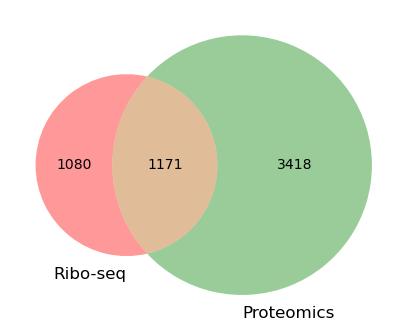

In [9]:
# Create the Series
set1 = set(df_ribo.index)
set2 = set(df_proteomics_TGFb.index)

#set_array = []
#set_names = ['Ribo-seq', 'Proteomics']


#set_array.append(set1)
#set_array.append(set2)

#venn2([set1, set2], ('Ribo-seq', 'Proteomics')) # venn2 works for two sets
#venn3(set_array[0:3], set_names[0:3])   # venn3 works for three sets
#plt.show()


plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
venn2([set1, set2], ('Ribo-seq', 'Proteomics')) # venn2 works for two sets
#fig.savefig('Venn diagram.pdf')
plt.savefig('./tiff/Venn diagram Unt Vs TGFb Ribo-seq and total input proteomics.tiff', dpi=500)
plt.savefig('./pdf/Venn diagram Unt Vs TGFb Ribo-seq and total input proteomics.pdf', dpi=500)

# TGF𝛽 Vs. CX5461 Ribo-seq/total input proteomics

## Ribo-seq data

In [10]:
df.keys()
df_ribo = df[(df['tgfb.tgfbCX5461.DEtranslation'] == 'up') | (df['tgfb.tgfbCX5461.DEtranslation'] == 'down')]

print('Dimesnsion of the dataFrame df_ribo :', df_ribo.shape, '\n')
df_ribo.head()

Dimesnsion of the dataFrame df_ribo : (1188, 13) 



,unt.translation,tgfb.translation,tgfbCX5461.translation,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
rownames,,,,,,,,,,,,,
0610009B22Rik,-0.120930,-0.562358,0.459355,-0.441428,0.305416,0.140368,1.021713,0.029191,0.002929,notSig,up,notSig,protein_coding
1810013L24Rik,1.788917,1.981210,2.870199,0.192293,0.367281,0.187310,0.888989,0.000113,0.000002,notSig,up,notSig,protein_coding
2200002D01Rik,2.057251,1.513171,2.321169,-0.544080,0.009851,0.001401,0.807998,0.001713,0.000069,down,up,downUp,protein_coding
2310030G06Rik,-0.805478,-0.165200,0.917421,0.640278,0.170312,0.058796,1.082621,0.014544,0.001122,notSig,up,notSig,protein_coding
4930503L19Rik,-2.569610,-4.379670,-0.901781,-1.810060,0.186930,0.067228,3.477889,0.011334,0.000802,notSig,up,notSig,protein_coding


## Total input proteomics data

In [11]:
data = data_proteomics.sort_values(by=['log2(TCX/TGFB)'], ascending=False)
data = (data >>
 mask(data.DE =='yes'))

data = data[~data.index.duplicated(keep='first')] # Remove duplicated genes
df_proteomics_CX = data[abs(data['log2(TCX/TGFB)']) > 0.26]
print('Dimesnsion of the dataFrame df_proteomics :', df_proteomics_CX.shape)
data.keys()

Dimesnsion of the dataFrame df_proteomics : (344, 20)


Index(['WPG', 'Protein Accession #', 'Annotation', 'PSM#', 'Peptide#',
       '%Coverage', 'US1', 'US3', 'TGFB1', 'TGFB2', 'TGFB3', 'TCX1', 'TCX2',
       'TCX3', 'log2(TGFB/US)', 'log2(TCX/TGFB)', 'log2(TCX/US)', 'p value',
       'FDR', 'DE'],
      dtype='object')

## Venn diagram

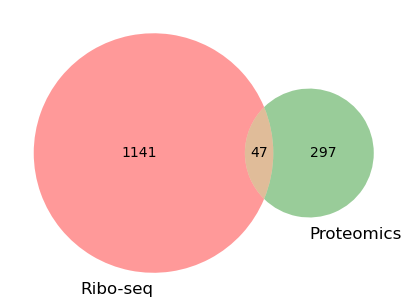

In [12]:
# Create the Series
set3 = set(df_ribo.index)
set4 = set(df_proteomics_CX.index)

plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
venn2([set3, set4], ('Ribo-seq', 'Proteomics')) 
#fig.savefig('Venn diagram.pdf')
plt.savefig('./tiff/Venn diagram TGFb Vs CX5461 Ribo-seq and total input proteomics.tiff', dpi=500)
plt.savefig('./pdf/Venn diagram TGFb Vs CX5461 Ribo-seq and total input proteomics.pdf', dpi=500)

In [13]:
set_intersect = set1.intersection(set2, set3, set4)

print("The length of set is:", len(set_intersect), '\n')
print('These are genes which are common in Ribo-seq and total proteomics' , sorted(set_intersect))

The length of set is: 30 

These are genes which are common in Ribo-seq and total proteomics ['Arl8a', 'Calm1', 'Ccn1', 'Ccn2', 'Ccnb1', 'Cdh1', 'Cdkn1a', 'Cox7b', 'Cstb', 'Dcxr', 'Fn1', 'Fosl1', 'Gla', 'Gpx4', 'Gtse1', 'Hspg2', 'Krt19', 'Mcam', 'Pdgfb', 'Psrc1', 'Rhob', 'Rps19bp1', 'Rps27a', 'Sdc1', 'Spp1', 'Sppl3', 'Tagln', 'Tspan7', 'Tyms', 'Vcl']


# TGF𝛽 Vs. CX5461 Ribo-seq/Polysome proteomics

## Ribos-seq

## Polysome fraction proteomics

In [14]:
data_poly_prot =  pd.read_csv('C:/Users/nmishra/Dropbox/PC/Desktop/Polysomes RNAseq EMT/jupyter codes/Blancgrp_EMT_1Whole_Proteome_TMT_2polysomes_v4.6.txt', sep="\t", na_filter=True, index_col=1) #Either I will use index_col=1 or data.set_index('Gene name')
#data = data.set_index('Gene name')
data_poly_prot = data_poly_prot.dropna(axis='columns', how ='all')
data_poly_prot = data_poly_prot[data_poly_prot.index.notnull()]
print('Dimesnsion of the polysome proteomics dataFrame data_poly_prot :', data_poly_prot.shape)
data_poly_prot.head()

Dimesnsion of the polysome proteomics dataFrame data_poly_prot : (6579, 21)


,WPG,Protein Accession,Annotation,PSM,Peptide,Coverage,US1,US2,US3,TGFB1,...,TGFB3,TCX1,TCX2,TCX3,log2(TGFB/US),log2(TCX/TGFB),log2(TCX/US),p value,FDR,DE
Gene name,,,,,,,,,,,,,,,,,,,,,
1700018B24Rik,1.0,tr|Q9D2S9|Q9D2S9_MOUSE,Enhancer of rudimentary homolog OS=Mus musculu...,9,2,6.67,187214.43360,209001.18180,179054.06180,188453.61190,...,204023.61950,268658.53270,224303.82410,233622.64150,0.002826,0.332778,0.335603,0.016490,0.028675,yes
Aarsd1,1.0,sp|Q3THG9|AASD1_MOUSE,Alanyl-tRNA editing protein Aarsd1 OS=Mus musc...,3,3,12.62,102820.89510,88749.62609,92219.90325,89918.86768,...,91583.22144,123017.89580,106880.20120,120741.98750,-0.017022,0.322253,0.305231,0.016583,0.028814,yes
Actn2,1.0,sp|Q9JI91|ACTN2_MOUSE,Alpha-actinin-2 OS=Mus musculus OX=10090 GN=Ac...,10,6,6.15,18801.96402,13909.45913,17462.19091,22222.68958,...,18684.61417,30167.51678,29710.73526,27531.18319,0.296881,0.514407,0.811288,0.000368,0.001371,yes
Adamtsl3,1.0,tr|G3UXC7|G3UXC7_MOUSE,ADAMTS-like 3 OS=Mus musculus OX=10090 GN=Adam...,3,3,2.11,26392.57550,21848.70811,25348.34033,19112.93497,...,19955.73917,31303.78872,30691.45691,29421.33866,-0.173712,0.490868,0.317155,0.016935,0.029353,yes
Ago4,1.0,tr|Q8CGT8|Q8CGT8_MOUSE,Argonaute 4 protein OS=Mus musculus OX=10090 G...,23,8,6.03,57244.29298,46861.12922,51243.51570,57744.67894,...,61472.54820,81442.43150,70119.04755,81302.38691,0.234269,0.351062,0.585331,0.001254,0.003531,yes


### Filter

In [15]:
data = data_poly_prot.sort_values(by=['log2(TGFB/US)'], ascending=False)
data = (data >>
 mask(data.DE =='yes'))

data = data[~data.index.duplicated(keep='first')] # Remove duplicated genes

poly_prot_TGFb = data[abs(data['log2(TGFB/US)']) > 0.31]
print('Dimesnsion of the polysome proteomics dataFrame :', poly_prot_TGFb.shape)

Dimesnsion of the polysome proteomics dataFrame : (3048, 21)


## Venn diagram

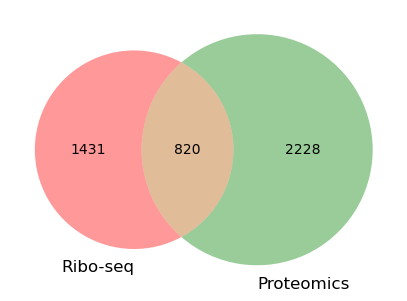

In [16]:
#%matplotlib widget
set5 = set(poly_prot_TGFb.index)

#fig = plt.figure(dpi=300)
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
venn2([set1, set5], ('Ribo-seq', 'Proteomics')) # venn2 works for two sets
#fig.savefig('Venn diagram.pdf')
plt.savefig('./tiff/Venn diagram Unt Vs TGFb Ribo-seq and Polysome.tiff', dpi=500)
plt.savefig('./pdf/Venn diagram Unt Vs TGFb Ribo-seq and Polysome.pdf', dpi=500)
#plt.show()

# TGF𝛽 Vs. CX5461 Ribo-seq/polysome fraction proteomics

In [17]:
data = data_poly_prot.sort_values(by=['log2(TCX/TGFB)'], ascending=False)
data = (data >>
 mask(data.DE =='yes'))

data = data[~data.index.duplicated(keep='first')] # Remove duplicated genes

poly_prot_CX = data[abs(data['log2(TCX/TGFB)']) > 0.31]
print('Dimesnsion of the polysome proteomics dataFrame polysome proteomics CX5461 :', poly_prot_CX.shape)

Dimesnsion of the polysome proteomics dataFrame polysome proteomics CX5461 : (2034, 21)


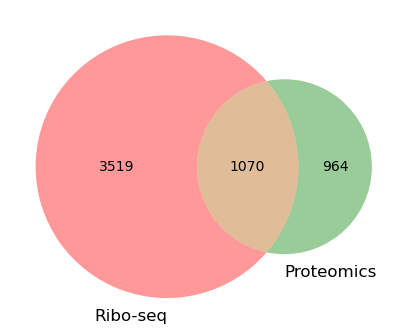

In [18]:
set6 = set(poly_prot_CX.index)

#fig = plt.figure(dpi=300)
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
venn2([set2, set6], ('Ribo-seq', 'Proteomics')) # venn2 works for two sets
#fig.savefig('Venn diagram.pdf')
plt.savefig('./tiff/Venn diagram TGFb Vs CX Ribo-seq and Polysome fraction proteomics.tiff', dpi=500)
plt.savefig('./pdf/Venn diagram TGFb Vs CX Ribo-seq and Polysome fraction proteomics.pdf', dpi=500)

# upDown/downUp category in Ribo-seq/Total-input proteomics

## upDown/downUp in total input proteomics

In [19]:
data_proteomics =  pd.read_csv('C:/Users/nmishra/Dropbox/PC/Desktop/Polysomes RNAseq EMT/jupyter codes/Blancgrp_EMT_1Whole_Proteome_TMT_3totalcells_quick_lysis_v4.6.txt', sep="\t", na_filter=True, index_col=1) #Either I will use index_col=1 or data.set_index('Gene name')
#data = data.set_index('Gene name')
data_proteomics = data_proteomics.dropna(axis='columns', how ='all')
data_proteomics = data_proteomics[data_proteomics.index.notnull()]


data = data_proteomics.sort_values(by=['log2(TGFB/US)'], ascending=False)
data = (data >>
 mask(data.DE =='yes'))

data = data[~data.index.duplicated(keep='first')] # Remove duplicated genes
print(df.shape)
print(data.keys())

(11452, 13)
Index(['WPG', 'Protein Accession #', 'Annotation', 'PSM#', 'Peptide#',
       '%Coverage', 'US1', 'US3', 'TGFB1', 'TGFB2', 'TGFB3', 'TCX1', 'TCX2',
       'TCX3', 'log2(TGFB/US)', 'log2(TCX/TGFB)', 'log2(TCX/US)', 'p value',
       'FDR', 'DE'],
      dtype='object')


In [20]:
total_proteomics_upUp = data[(data['log2(TGFB/US)'] > 0.26) & (data['log2(TCX/TGFB)'] > 0.26)]
total_proteomics_upDown = data[(data['log2(TGFB/US)'] > 0.26) & (data['log2(TCX/TGFB)'] < -0.26)]
total_proteomics_downUp = data[(data['log2(TGFB/US)'] < -0.26) & (data['log2(TCX/TGFB)'] > 0.26)]
total_proteomics_downDown = data[(data['log2(TGFB/US)'] < -0.26) & (data['log2(TCX/TGFB)'] < -0.26)]

print('Dimesnsion of the dataFrame Ribo-seq/Total-input upUp :', total_proteomics_upUp.shape)
print('Dimesnsion of the dataFrame Ribo-seq/Total-input upDown :', total_proteomics_upDown.shape)
print('Dimesnsion of the dataFrame Ribo-seq/Total-input downUp :', total_proteomics_downUp.shape)
print('Dimesnsion of the dataFrame Ribo-seq/Total-input downDown :', total_proteomics_downDown.shape)

Dimesnsion of the dataFrame Ribo-seq/Total-input upUp : (29, 20)
Dimesnsion of the dataFrame Ribo-seq/Total-input upDown : (74, 20)
Dimesnsion of the dataFrame Ribo-seq/Total-input downUp : (109, 20)
Dimesnsion of the dataFrame Ribo-seq/Total-input downDown : (67, 20)


## upDown/downUp in Ribo-seq

In [21]:
print(df.keys())
df_upDown = df[(df['reversible.translation']== 'upDown')]
df_downUp = df[(df['reversible.translation']== 'downUp')]

print('Dimesnsion of the dataFrame df_upDown :', df_upDown.shape)
print('Dimesnsion of the dataFrame df_downUp :', df_downUp.shape)

print(df[['reversible.translation']].value_counts())

Index(['unt.translation', 'tgfb.translation', 'tgfbCX5461.translation',
       'log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation',
       'PuntVStgfb.translation', 'log2FCtgfbVStgfbCX5461.translation',
       'FDRtgfbVStgfbCX5461.translation', 'PtgfbVStgfbCX5461.translation',
       'unt.tgfb.DEtranslation', 'tgfb.tgfbCX5461.DEtranslation',
       'reversible.translation', 'biotype'],
      dtype='object')
Dimesnsion of the dataFrame df_upDown : (301, 13)
Dimesnsion of the dataFrame df_downUp : (262, 13)
reversible.translation
notSig                    9410
upDown                     301
downUp                     262
dtype: int64


## Intersect genes upDown in Ribo-seq and total proteomics

In [22]:
set_upDown = set(df_upDown.index)
set_upDown = set_upDown.intersection(set(total_proteomics_upDown.index), set_intersect)
print("The length of genes upDown in Ribo-seq and Total proteomics:", len(set_upDown), '\n')
print("These are the", len(set_upDown), "upDown genes which are common in Ribo-seq and total proteomics data :" ,sorted(set_upDown))

The length of genes upDown in Ribo-seq and Total proteomics: 9 

These are the 9 upDown genes which are common in Ribo-seq and total proteomics data : ['Ccn1', 'Ccn2', 'Mcam', 'Pdgfb', 'Rhob', 'Sdc1', 'Spp1', 'Sppl3', 'Tagln']


### Venn diagram

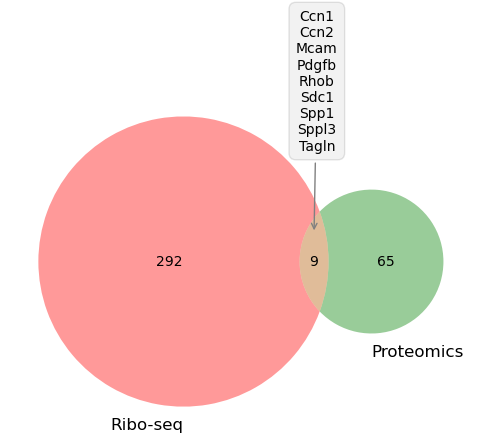

In [23]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_upDown.index)
B = set(total_proteomics_upDown.index)
v = venn2([A, B], ('Ribo-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
             np.array([0, 0.1]), xytext=(2,60), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))
plt.tight_layout()
plt.savefig('./tiff/upDown Venn diagram Ribo-seq and total input proteomics.tiff', dpi=500)
plt.savefig('./pdf/upDown Venn diagram Ribo-seq and total input proteomics.pdf', dpi=500)

### Intersect genes downUp in Ribo-seq and total proteomics

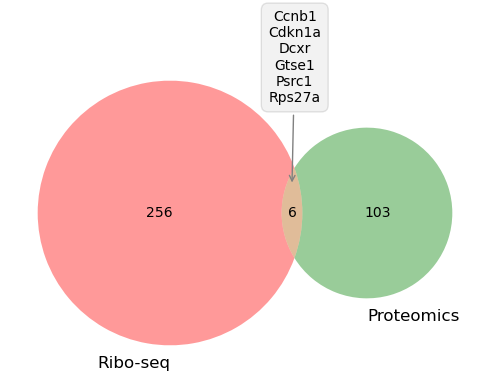

In [24]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_downUp.index)
B = set(total_proteomics_downUp.index)
v = venn2([A, B], ('Ribo-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
             np.array([0, 0.1]), xytext=(2,60), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))
plt.tight_layout()
plt.savefig('./tiff/downUp Venn diagram Ribo-seq and total input proteomics.tiff', dpi=500)
plt.savefig('./pdf/downUp Venn diagram Ribo-seq and total input proteomics.pdf', dpi=500)

# upDown/downUp category in Ribo-seq/Polysome fraction proteomics

## upDown/downUp in polysome fraction proteomics

In [25]:
data_poly_prot =  pd.read_csv('C:/Users/nmishra/Dropbox/PC/Desktop/Polysomes RNAseq EMT/jupyter codes/Blancgrp_EMT_1Whole_Proteome_TMT_2polysomes_v4.6.txt', sep="\t", na_filter=True, index_col=1) #Either I will use index_col=1 or data.set_index('Gene name')
#data = data.set_index('Gene name')
data_poly_prot = data_poly_prot.dropna(axis='columns', how ='all')
data_poly_prot = data_poly_prot[data_poly_prot.index.notnull()]

data = data_poly_prot.sort_values(by=['log2(TGFB/US)'], ascending=False)
data = (data >>
 mask(data.DE =='yes'))

data = data[~data.index.duplicated(keep='first')] # Remove duplicated genes
print(df.shape)
print(data.keys())

(11452, 13)
Index(['WPG', 'Protein Accession', 'Annotation', 'PSM', 'Peptide', 'Coverage',
       'US1', 'US2', 'US3', 'TGFB1', 'TGFB2', 'TGFB3', 'TCX1', 'TCX2', 'TCX3',
       'log2(TGFB/US)', 'log2(TCX/TGFB)', 'log2(TCX/US)', 'p value', 'FDR',
       'DE'],
      dtype='object')


In [26]:
total_poly_upUp = data[(data['log2(TGFB/US)'] > 0.31) & (data['log2(TCX/TGFB)'] > 0.31)]
total_poly_upDown = data[(data['log2(TGFB/US)'] > 0.31) & (data['log2(TCX/TGFB)'] < -0.31)]
total_poly_downUp = data[(data['log2(TGFB/US)'] < -0.31) & (data['log2(TCX/TGFB)'] > 0.31)]
total_poly_downDown = data[(data['log2(TGFB/US)'] < -0.31) & (data['log2(TCX/TGFB)'] < -0.31)]

print('Dimesnsion of the dataFrame Ribo-seq/Polysome upUp :', total_poly_upUp.shape)
print('Dimesnsion of the dataFrame Ribo-seq/Polysome upDown :', total_poly_upDown.shape)
print('Dimesnsion of the dataFrame Ribo-seq/Polysome downUp :', total_poly_downUp.shape)
print('Dimesnsion of the dataFrame Ribo-seq/Polysome downDown :', total_poly_downDown.shape)

Dimesnsion of the dataFrame Ribo-seq/Polysome upUp : (75, 21)
Dimesnsion of the dataFrame Ribo-seq/Polysome upDown : (713, 21)
Dimesnsion of the dataFrame Ribo-seq/Polysome downUp : (68, 21)
Dimesnsion of the dataFrame Ribo-seq/Polysome downDown : (506, 21)


## Intersect genes upDown in Ribo-seq and polysome proteomics

### Venn diagram

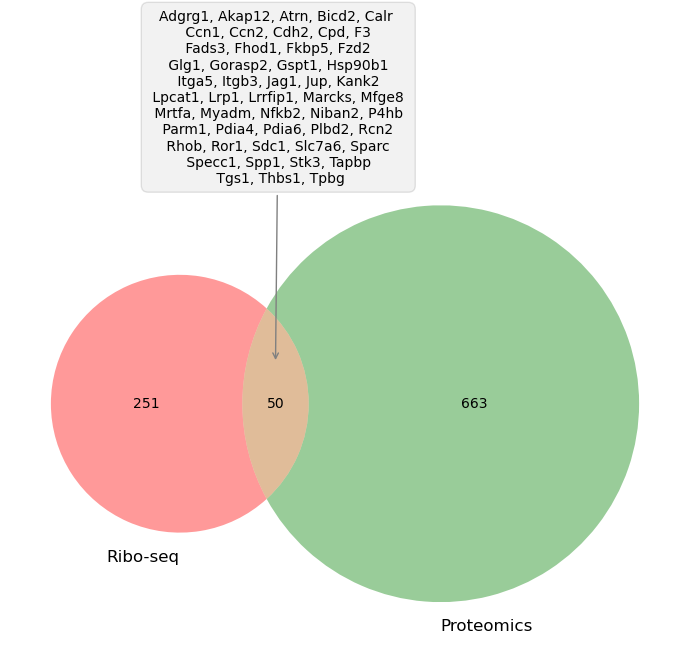

In [27]:
plt.rcParams['figure.figsize'] = [7, 7] # plt.figure plot very big file if dpi is over 100
A = set(df_upDown.index)
B = set(total_poly_upDown.index)
v = venn2([A, B], ('Ribo-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))
#C = 'Adgrg1, Akap12, Atrn, Bicd2, Calr \n Ccn1, Ccn2, Cdh2, Cpd, F3 \n Fads3, Fhod1, Fkbp5, Fzd2, Glg1 \n Itga5, Itgb3, Jup, Kank2, Lpcat1 \n Lrp1, Lrrfip1, Mfge8, Mrtfa, Myadm \n Nfkb2, Niban2, Parm1, Pdia4, Rcn2 \n Rhob, Sdc1, Slc7a6, Sparc, Specc1 \n Spp1, Tapbp, Thbs1, Tpbg'
C = 'Adgrg1, Akap12, Atrn, Bicd2, Calr \n Ccn1, Ccn2, Cdh2, Cpd, F3 \n Fads3, Fhod1, Fkbp5, Fzd2 \n Glg1, Gorasp2, Gspt1, Hsp90b1 \n Itga5, Itgb3, Jag1, Jup, Kank2 \n Lpcat1, Lrp1, Lrrfip1, Marcks, Mfge8 \n Mrtfa, Myadm, Nfkb2, Niban2, P4hb \n Parm1, Pdia4, Pdia6, Plbd2, Rcn2 \n Rhob, Ror1, Sdc1, Slc7a6, Sparc \n Specc1, Spp1, Stk3, Tapbp \n Tgs1, Thbs1, Tpbg'
#plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
plt.annotate(C, xy=v.get_label_by_id('11').get_position() +
             np.array([0, 0.1]), xytext=(2,130), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))
plt.tight_layout()
plt.savefig('./tiff/upDown Venn diagram Ribo-seq and Polysome proteomics.tiff', dpi=500)
plt.savefig('./pdf/upDown Venn diagram Ribo-seq and Polysome proteomics.pdf', dpi=500)


In [28]:
print(sorted(A.intersection(B)))

['Adgrg1', 'Akap12', 'Atrn', 'Bicd2', 'Calr', 'Ccn1', 'Ccn2', 'Cdh2', 'Cpd', 'F3', 'Fads3', 'Fhod1', 'Fkbp5', 'Fzd2', 'Glg1', 'Gorasp2', 'Gspt1', 'Hsp90b1', 'Itga5', 'Itgb3', 'Jag1', 'Jup', 'Kank2', 'Lpcat1', 'Lrp1', 'Lrrfip1', 'Marcks', 'Mfge8', 'Mrtfa', 'Myadm', 'Nfkb2', 'Niban2', 'P4hb', 'Parm1', 'Pdia4', 'Pdia6', 'Plbd2', 'Rcn2', 'Rhob', 'Ror1', 'Sdc1', 'Slc7a6', 'Sparc', 'Specc1', 'Spp1', 'Stk3', 'Tapbp', 'Tgs1', 'Thbs1', 'Tpbg']


## Intersect genes downUp in Ribo-seq and polysome proteomics

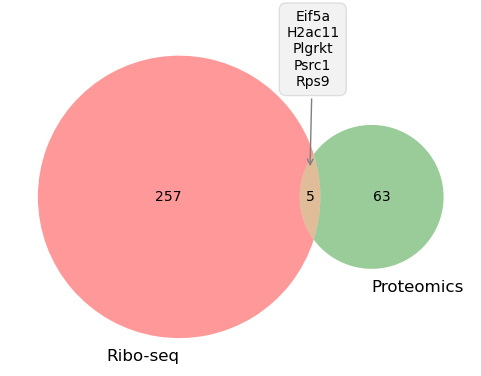

In [29]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_downUp.index)
B = set(total_poly_downUp.index)
v = venn2([A, B], ('Ribo-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
             np.array([0, 0.1]), xytext=(2,60), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))
plt.tight_layout()
plt.savefig('./tiff/downUp Venn diagram Ribo-seq and Polysome proteomics.tiff', dpi=500)
plt.savefig('./pdf/downUp Venn diagram Ribo-seq and Polysome proteomics.pdf', dpi=500)

In [30]:
set_downUp = set(df_downUp.index)
set_downUp = set_downUp.intersection(set(total_poly_downUp.index))
set_downUp

{'Eif5a', 'H2ac11', 'Plgrkt', 'Psrc1', 'Rps9'}

# Polysome RNA-seq and total input proteomics Venn diagram
<font size = 3><b> Based on upDown/downUp of Polysome RNAseq Vs Ribo-seq

### load Polysome Rdata

In [31]:
print('Load R workspace image (.RData) file in Python\n')
result = pyreadr.read_r('C:/Users/nmishra/Dropbox/PC/Desktop/EMT-2022-August/Polysome_RNAseq_backup/jupyter codes/rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata') # by using pyreadr
print('Name of all files/function/variables in Rdata image\n')
print(result.keys(), '\n') # Name of all files/function/variables in Rdata image

df_all = result["df_all"]

print('Dimesnsion of the dataFrame df_all :', df_all.shape,"\n")
df_all.head()
#df_all.loc[["Zbp1"]]

Load R workspace image (.RData) file in Python

Name of all files/function/variables in Rdata image

odict_keys(['df_all']) 

Dimesnsion of the dataFrame df_all : (12192, 31) 



,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
rownames,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,-0.384215,-0.207784,-0.578218,0.176431,...,-0.147909,0.618719,0.500992,0.078268,0.864280,0.746352,notSig,notSig,notSig,protein_coding
0610010F05Rik,11,23514961,23583639,68679,-,ensembl_havana,1.469728,1.754698,1.607188,0.284970,...,0.694990,0.002980,0.000672,-0.797187,0.004750,0.000394,up,down,upDown,protein_coding
0610010K14Rik,11,70126032,70128740,2709,-,ensembl_havana,-0.352949,-0.870655,-1.072284,-0.517707,...,-0.740848,0.025923,0.008925,0.117857,0.839611,0.705715,down,notSig,notSig,protein_coding
0610012G03Rik,16,31765868,31767312,1445,-,havana,0.374806,0.863984,0.886400,0.489177,...,-0.331533,0.263892,0.161736,0.244870,0.546510,0.321908,notSig,notSig,notSig,protein_coding
0610030E20Rik,6,72324300,72330131,5832,+,ensembl_havana,0.057414,0.163525,-0.322434,0.106111,...,0.141279,0.673414,0.567188,-0.205945,0.664742,0.457303,notSig,notSig,notSig,protein_coding


In [32]:
print(df_all.keys())

df = ( df_all >>
  mask(df_all.biotype =='protein_coding')) #>>
 # mask(df_all. == 'up'))

df = df.filter(regex=r'translation|biotype')
df = df.dropna(how='all')
print(df.shape)

Index(['seqnames', 'start', 'end', 'width', 'strand', 'source',
       'unt.transcription', 'tgfb.transcription', 'tgfbCX5461.transcription',
       'log2FCuntVStgfb.transcription', 'FDRuntVStgfb.transcription',
       'PuntVStgfb.transcription', 'log2FCtgfbVStgfbCX5461.transcription',
       'FDRtgfbVStgfbCX5461.transcription', 'PtgfbVStgfbCX5461.transcription',
       'unt.tgfb.DEtranscription', 'tgfb.tgfbCX5461.DEtranscription',
       'reversible.transcription', 'unt.translation', 'tgfb.translation',
       'tgfbCX5461.translation', 'log2FCuntVStgfb.translation',
       'FDRuntVStgfb.translation', 'PuntVStgfb.translation',
       'log2FCtgfbVStgfbCX5461.translation', 'FDRtgfbVStgfbCX5461.translation',
       'PtgfbVStgfbCX5461.translation', 'unt.tgfb.DEtranslation',
       'tgfb.tgfbCX5461.DEtranslation', 'reversible.translation', 'biotype'],
      dtype='object')
(11116, 13)


In [33]:
df_poly = df[(df['unt.tgfb.DEtranslation'] == 'up') | (df['unt.tgfb.DEtranslation'] == 'down')]

print('Dimesnsion of the dataFrame df_poly :', df_poly.shape, '\n')
df_poly.head()

Dimesnsion of the dataFrame df_poly : (4487, 13) 



,unt.translation,tgfb.translation,tgfbCX5461.translation,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
rownames,,,,,,,,,,,,,
0610010F05Rik,0.236436,0.931427,0.134240,0.694990,0.002980,6.715400e-04,-0.797187,0.004750,0.000394,up,down,upDown,protein_coding
0610010K14Rik,-0.599006,-1.339853,-1.221996,-0.740848,0.025923,8.925298e-03,0.117857,0.839611,0.705715,down,notSig,notSig,protein_coding
0610040J01Rik,-0.806454,-4.620140,-3.007701,-3.813686,0.000003,2.372000e-07,1.612438,0.094293,0.021693,down,notSig,notSig,protein_coding
1110008P14Rik,0.911071,0.387442,0.767525,-0.523629,0.036253,1.348448e-02,0.380083,0.232230,0.083258,down,notSig,notSig,protein_coding
1110038F14Rik,-0.258387,-0.843218,-0.945695,-0.584830,0.028654,1.008270e-02,-0.102477,0.828061,0.683834,down,notSig,notSig,protein_coding


In [34]:
print(df.keys())
df_poly_upDown = df[(df['reversible.translation']== 'upDown')]
df_poly_downUp = df[(df['reversible.translation']== 'downUp')]

print('Dimesnsion of the dataFrame df_poly_upDown :', df_poly_upDown.shape)
print('Dimesnsion of the dataFrame df_poly_downUp :', df_poly_downUp.shape)

print(df_poly[['reversible.translation']].value_counts())

Index(['unt.translation', 'tgfb.translation', 'tgfbCX5461.translation',
       'log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation',
       'PuntVStgfb.translation', 'log2FCtgfbVStgfbCX5461.translation',
       'FDRtgfbVStgfbCX5461.translation', 'PtgfbVStgfbCX5461.translation',
       'unt.tgfb.DEtranslation', 'tgfb.tgfbCX5461.DEtranslation',
       'reversible.translation', 'biotype'],
      dtype='object')
Dimesnsion of the dataFrame df_poly_upDown : (189, 13)
Dimesnsion of the dataFrame df_poly_downUp : (234, 13)
reversible.translation
notSig                    4064
downUp                     234
upDown                     189
dtype: int64


# Polysome RNAseq and total input proteomics Venn diagram

## Venn diagram Poly RNA-seq and total input proteomics

### upDown

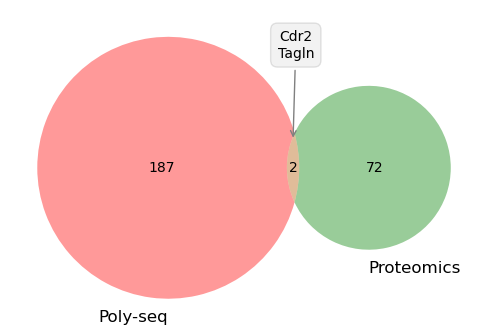

In [35]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_poly_upDown.index)
B = set(total_proteomics_upDown.index)
v = venn2([A, B], ('Poly-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
             np.array([0, 0.1]), xytext=(2,60), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))

plt.tight_layout()
plt.savefig('./tiff/upDown Venn diagram Poly-seq and total input proteomics.tiff', dpi=500)
plt.savefig('./pdf/upDown Venn diagram Poly-seq and total input proteomics.pdf', dpi=500)

### downUp

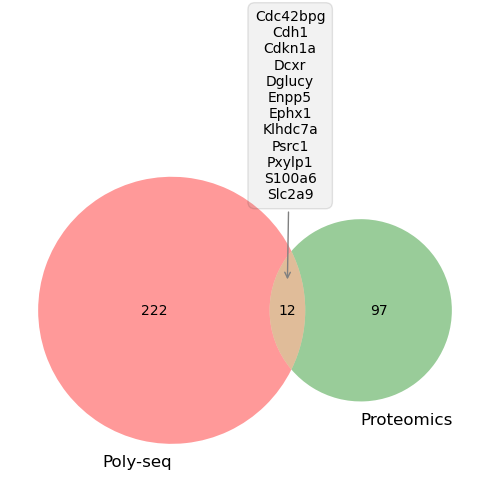

In [36]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_poly_downUp.index)
B = set(total_proteomics_downUp.index)
v = venn2([A, B], ('Poly-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
             np.array([0, 0.1]), xytext=(2,60), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))

plt.tight_layout()
plt.savefig('./tiff/downUp Venn diagram Poly-seq and total input proteomics.tiff', dpi=500)
plt.savefig('./pdf/downUp Venn diagram Poly-seq and total input proteomics.pdf', dpi=500)

# Polysome RNAseq and polysome proteomics Venn diagram

## Venn diagram Poly RNA-seq and Polysome proteomics

### upDown

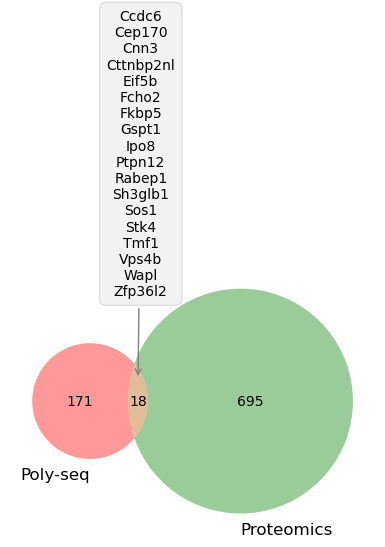

In [37]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_poly_upDown.index)
B = set(total_poly_upDown.index)
v = venn2([A, B], ('Poly-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
             np.array([0, 0.1]), xytext=(2,60), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))

plt.tight_layout()
plt.savefig('./tiff/upDown Venn diagram Poly-seq and Polysome proteomics.tiff', dpi=500)
plt.savefig('./pdf/upDown Venn diagram Poly-seq and Polysome proteomics.pdf', dpi=500)

### downUp

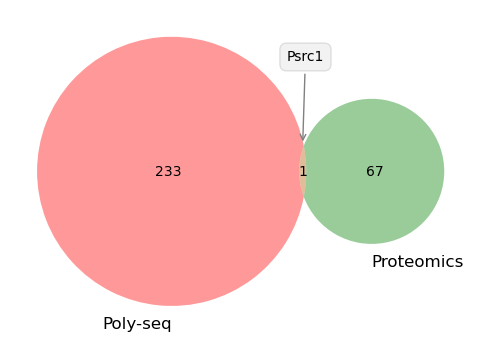

In [38]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_poly_downUp.index)
B = set(total_poly_downUp.index)
v = venn2([A, B], ('Poly-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
             np.array([0, 0.1]), xytext=(2,60), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))

plt.tight_layout()
plt.savefig('./tiff/downUp Venn diagram Poly-seq and Polysome proteomics.tiff', dpi=500)
plt.savefig('./pdf/downUp Venn diagram Poly-seq and Polysome proteomics.pdf', dpi=500)

# Monosome RNAseq and total input proteomics Venn diagram

In [39]:
print('Load R workspace image (.RData) file in Python\n')
result = pyreadr.read_r('C:/Users/nmishra/Desktop/EMT-2022-August/Polysomes RNAseq EMT/jupyter codes/Monosome/rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata') # by using pyreadr
print('Name of all files/function/variables in Rdata image\n')
print(result.keys(), '\n') # Name of all files/function/variables in Rdata image

df_all = result["df_monosome"]

print('Dimesnsion of the dataFrame df_all :', df_all.shape,"\n")
df_all.head()

Load R workspace image (.RData) file in Python

Name of all files/function/variables in Rdata image

odict_keys(['df_monosome']) 

Dimesnsion of the dataFrame df_all : (9536, 19) 



,seqnames,start,end,width,strand,source,unt.monosome,tgfb.monosome,tgfbCX5461.monosome,log2FCuntVStgfb.monosome,FDRuntVStgfb.monosome,PuntVStgfb.monosome,log2FCtgfbVStgfbCX5461.monosome,FDRtgfbVStgfbCX5461.monosome,PtgfbVStgfbCX5461.monosome,unt.tgfb.DEmonosome,tgfb.tgfbCX5461.DEmonosome,reversible.monosome,biotype
rownames,,,,,,,,,,,,,,,,,,,
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,-4.802467,-3.917779,-4.237664,0.884688,0.434934,0.230691,-0.319884,0.886113,0.622583,notSig,notSig,notSig,protein_coding
0610010F05Rik,11,23514961,23583639,68679,-,ensembl_havana,-3.602165,-2.776520,-3.001745,0.825644,0.283807,0.119221,-0.225224,0.878598,0.605528,notSig,notSig,notSig,protein_coding
0610010K14Rik,11,70126032,70128740,2709,-,ensembl_havana,-3.237887,-3.662633,-3.960501,-0.424747,0.623032,0.416453,-0.297868,0.880184,0.608818,notSig,notSig,notSig,protein_coding
0610012G03Rik,16,31765868,31767312,1445,-,havana,-1.009249,-1.369235,-0.927488,-0.359986,0.409575,0.210672,0.441747,0.518890,0.110244,notSig,notSig,notSig,protein_coding
0610030E20Rik,6,72324300,72330131,5832,+,ensembl_havana,-3.098328,-3.524003,-3.779015,-0.425675,0.622282,0.415290,-0.255012,0.894857,0.648177,notSig,notSig,notSig,protein_coding


In [40]:
print(df_all.keys())

df = ( df_all >>
  mask(df_all.biotype =='protein_coding')) #>>
 # mask(df_all. == 'up'))

df = df.filter(regex=r'monosome|biotype')
df = df.dropna(how='all')
print(df.shape)
df.head()

Index(['seqnames', 'start', 'end', 'width', 'strand', 'source', 'unt.monosome',
       'tgfb.monosome', 'tgfbCX5461.monosome', 'log2FCuntVStgfb.monosome',
       'FDRuntVStgfb.monosome', 'PuntVStgfb.monosome',
       'log2FCtgfbVStgfbCX5461.monosome', 'FDRtgfbVStgfbCX5461.monosome',
       'PtgfbVStgfbCX5461.monosome', 'unt.tgfb.DEmonosome',
       'tgfb.tgfbCX5461.DEmonosome', 'reversible.monosome', 'biotype'],
      dtype='object')
(9098, 13)


,unt.monosome,tgfb.monosome,tgfbCX5461.monosome,log2FCuntVStgfb.monosome,FDRuntVStgfb.monosome,PuntVStgfb.monosome,log2FCtgfbVStgfbCX5461.monosome,FDRtgfbVStgfbCX5461.monosome,PtgfbVStgfbCX5461.monosome,unt.tgfb.DEmonosome,tgfb.tgfbCX5461.DEmonosome,reversible.monosome,biotype
rownames,,,,,,,,,,,,,
0610009B22Rik,-4.802467,-3.917779,-4.237664,0.884688,0.434934,0.230691,-0.319884,0.886113,0.622583,notSig,notSig,notSig,protein_coding
0610010F05Rik,-3.602165,-2.776520,-3.001745,0.825644,0.283807,0.119221,-0.225224,0.878598,0.605528,notSig,notSig,notSig,protein_coding
0610010K14Rik,-3.237887,-3.662633,-3.960501,-0.424747,0.623032,0.416453,-0.297868,0.880184,0.608818,notSig,notSig,notSig,protein_coding
0610012G03Rik,-1.009249,-1.369235,-0.927488,-0.359986,0.409575,0.210672,0.441747,0.518890,0.110244,notSig,notSig,notSig,protein_coding
0610030E20Rik,-3.098328,-3.524003,-3.779015,-0.425675,0.622282,0.415290,-0.255012,0.894857,0.648177,notSig,notSig,notSig,protein_coding


In [41]:
print(df[['unt.tgfb.DEmonosome']].value_counts())
print(df[['tgfb.tgfbCX5461.DEmonosome']].value_counts())

unt.tgfb.DEmonosome
notSig                 7390
up                      962
down                    746
dtype: int64
tgfb.tgfbCX5461.DEmonosome
notSig                        8965
up                             115
down                            18
dtype: int64


In [42]:
print(df.keys())
df_mono_upDown = df[(df['reversible.monosome']== 'upDown')]
df_mono_downUp = df[(df['reversible.monosome']== 'downUp')]

print('Dimesnsion of the dataFrame df_mono_upDown :', df_mono_upDown.shape)
print('Dimesnsion of the dataFrame df_mono_downUp :', df_mono_downUp.shape)

print(df[['reversible.monosome']].value_counts())

Index(['unt.monosome', 'tgfb.monosome', 'tgfbCX5461.monosome',
       'log2FCuntVStgfb.monosome', 'FDRuntVStgfb.monosome',
       'PuntVStgfb.monosome', 'log2FCtgfbVStgfbCX5461.monosome',
       'FDRtgfbVStgfbCX5461.monosome', 'PtgfbVStgfbCX5461.monosome',
       'unt.tgfb.DEmonosome', 'tgfb.tgfbCX5461.DEmonosome',
       'reversible.monosome', 'biotype'],
      dtype='object')
Dimesnsion of the dataFrame df_mono_upDown : (4, 13)
Dimesnsion of the dataFrame df_mono_downUp : (6, 13)
reversible.monosome
notSig                 9088
downUp                    6
upDown                    4
dtype: int64


## Venn diagram Mono RNA-seq and total input proteomics

### upDown

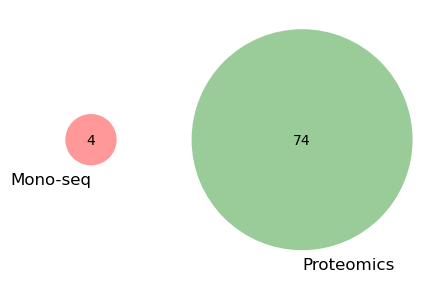

In [43]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_mono_upDown.index)
B = set(total_proteomics_upDown.index)
v = venn2([A, B], ('Mono-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

#plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
#             np.array([0, 0.1]), xytext=(2,60), ha='center',
#             textcoords='offset points', 
#             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#             arrowprops=dict(arrowstyle='->',              
#                             connectionstyle='arc',color='gray'))
plt.savefig('./tiff/upDown Venn diagram Mono-seq and total proteomics.tiff', dpi=500)
plt.savefig('./pdf/upDown Venn diagram Mono-seq and total proteomics.pdf', dpi=500)

### downUp

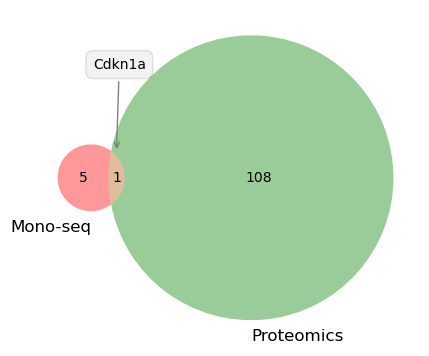

In [44]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_mono_downUp.index)
B = set(total_proteomics_downUp.index)
v = venn2([A, B], ('Mono-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
             np.array([0, 0.1]), xytext=(2,60), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))

plt.savefig('./tiff/downUp Venn diagram Mono-seq and total proteomics.tiff', dpi=500)
plt.savefig('./pdf/downUp Venn diagram Mono-seq and total proteomics.pdf', dpi=500)

# Monosome RNAseq and polysome proteomics Venn diagram

### upDown

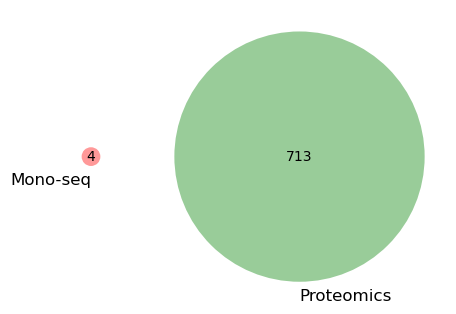

In [45]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_mono_upDown.index)
B = set(total_poly_upDown.index)
v = venn2([A, B], ('Mono-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

#plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
#             np.array([0, 0.1]), xytext=(2,60), ha='center',
#             textcoords='offset points', 
#             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#             arrowprops=dict(arrowstyle='->',              
#                             connectionstyle='arc',color='gray'))
plt.savefig('./tiff/upDown Venn diagram Mono-seq and Polysome proteomics.tiff', dpi=500)
plt.savefig('./pdf/upDown Venn diagram Mono-seq and Polysome proteomics.pdf', dpi=500)

### downUp

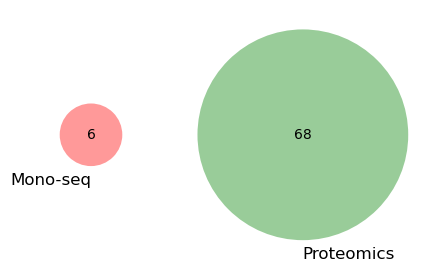

In [46]:
plt.rcParams['figure.figsize'] = [5, 5] # plt.figure plot very big file if dpi is over 100
A = set(df_mono_downUp.index)
B = set(total_poly_downUp.index)
v = venn2([A, B], ('Mono-seq', 'Proteomics')) # venn2 works for two sets
#v.get_label_by_id('11').set_text('\n'.join(A&B))

#plt.annotate('\n'.join(sorted(A&B)), xy=v.get_label_by_id('11').get_position() +
#             np.array([0, 0.1]), xytext=(2,60), ha='center',
#             textcoords='offset points', 
#             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#             arrowprops=dict(arrowstyle='->',              
#                             connectionstyle='arc',color='gray'))
plt.savefig('./tiff/downUp Venn diagram Mono-seq and Polysome proteomics.tiff', dpi=500)
plt.savefig('./pdf/downUp Venn diagram Mono-seq and Polysome proteomics.pdf', dpi=500)

# Common upDown gene's Venn diagram

In [47]:
from rpy2.robjects.packages import importr
VennDetail = importr('VennDetail')
base = importr('base')
gr = importr('grDevices')

[1] "All UpDown Venn Diagram"
All UpDown Gene's Venn Diagram


C:\Users\nmishra\AppData\Local\anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


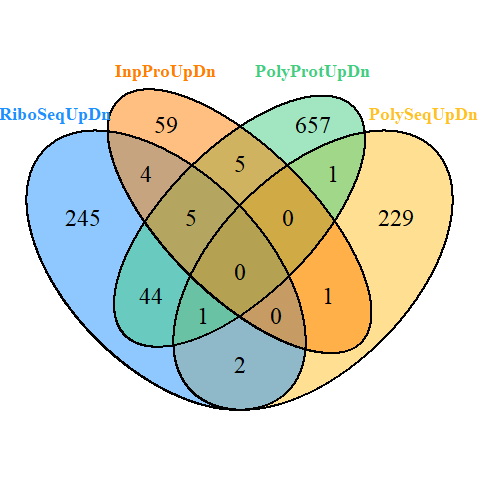

In [48]:
file_name = "All UpDown"
ven = VennDetail.venndetail(base.list(RiboSeqUpDn=ro.sequence_to_vector(df_upDown.index), PolySeqUpDn = ro.sequence_to_vector(df_poly_upDown.index), InpProUpDn = ro.sequence_to_vector(total_proteomics_upDown.index), PolyProtUpDn = ro.sequence_to_vector(total_poly_upDown.index)))
#base.plot(ven, main="Common gene")
base.print("All UpDown Venn Diagram")
gr.tiff(file=base.sprintf("./tiff/Venn Diagram for %s.tiff", file_name), width=8, height=8, units="in", res=500)
base.plot(ven)
gr.dev_off()

# Here I am using RMagic to display Venn diagram in jupyterLab cell. As If I am using base.plot it's displaying R plot in separate window and creating issue.
%reload_ext rpy2.ipython
print("All UpDown Gene's Venn Diagram")
ven = VennDetail.venndetail(base.list(RiboSeqUpDn=ro.sequence_to_vector(df_upDown.index), PolySeqUpDn = ro.sequence_to_vector(df_poly_downUp.index), InpProUpDn = ro.sequence_to_vector(total_proteomics_upDown.index), PolyProtUpDn = ro.sequence_to_vector(total_poly_upDown.index)))
%R -i ven plot(ven)

# Common downUp gene's Venn digram

[1] "All DownUp Venn Diagram"
All DownUp Gene's Venn Diagram


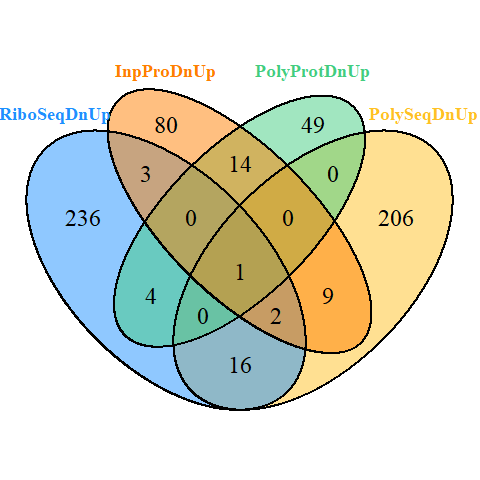

In [49]:
file_name = "All DownUp"
ven = VennDetail.venndetail(base.list(RiboSeqDnUp=ro.sequence_to_vector(df_downUp.index), PolySeqDnUp = ro.sequence_to_vector(df_poly_downUp.index), InpProDnUp = ro.sequence_to_vector(total_proteomics_downUp.index), PolyProtDnUp = ro.sequence_to_vector(total_poly_downUp.index)))
#base.plot(ven, main="Common gene")
base.print("All DownUp Venn Diagram")
gr.tiff(file=base.sprintf("./tiff/Venn Diagram for %s.tiff", file_name), width=8, height=8, units="in", res=500)
base.plot(ven)
gr.dev_off()

# Here I am using RMagic to display Venn diagram in jupyterLab cell. As If I am using base.plot it's displaying R plot in separate window and creating issue.
%reload_ext rpy2.ipython
print("All DownUp Gene's Venn Diagram")
ven = VennDetail.venndetail(base.list(RiboSeqDnUp=ro.sequence_to_vector(df_downUp.index), PolySeqDnUp = ro.sequence_to_vector(df_poly_downUp.index), InpProDnUp = ro.sequence_to_vector(total_proteomics_downUp.index), PolyProtDnUp = ro.sequence_to_vector(total_poly_downUp.index)))
%R -i ven plot(ven)